<a href="https://colab.research.google.com/github/DataDrivenAkanksha/deep_learning_facemask_detection/blob/main/Assignment_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment ANN CNN -Akanksha Rawat

a) What are vanishing and exploding gradients? How do they affect neural networks? Explain in detail.

Vanishing Gradient Problem
The vanishing gradient problem occurs during backpropagation when the gradients (partial derivatives of the loss with respect to weights) become very small—especially in deep neural networks.

Cause: This typically happens when using activation functions like sigmoid or tanh, where the derivative is less than 1. When many such small derivatives are multiplied (as in the chain rule), the resulting gradient becomes extremely small.

Effect: Weights in earlier layers are updated very slowly (or not at all), effectively stalling learning in those layers.

Consequence: The network fails to learn deep features, making it hard to train deep networks effectively.

Example: If each derivative is ~0.1 and you have 100 layers, the gradient becomes ~0.1¹⁰⁰ → effectively zero.

Exploding Gradient Problem
The exploding gradient problem is the opposite: gradients become very large during backpropagation.

Cause: This is often due to large weight values or activation functions like ReLU (though ReLU itself isn't the direct cause—it's more about the weights and initialization). When derivatives > 1 are multiplied across many layers, the gradient grows exponentially.

Effect: Weight updates become huge, causing the network to become unstable and possibly diverge (loss goes to infinity or NaN).

Consequence: The model cannot converge, and training fails.

Example: If each derivative is ~2 and you have 100 layers, the gradient becomes 2¹⁰⁰ → extremely large.

Solutions
For vanishing gradients:

Use ReLU, Leaky ReLU, or ELU instead of sigmoid/tanh.

Use Batch Normalization.

Use residual connections (like in ResNet).

Use proper weight initialization (e.g., Xavier or He initialization).

For exploding gradients:

Apply gradient clipping.

Use Batch Normalization.

Monitor and adjust learning rates.

Use proper weight initialization.

b) Use the Life Expectancy Prediction dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab to predict the life expectancy.

https://www.kaggle.com/code/ranasabrii/life-expectancy-regression-with-ann/notebook


i. Download the dataset from above link and load it into your Python environment.

ii. Perform the EDA and do the visualizations.

iii. Check the distributions/skewness in the variables and do the transformations if required.

iv. Check/Treat the outliers and do the feature scaling if required.

v. Build Deep Learning model using ANN with multiple hidden layers.

vi. Apply the dropout regularization and early stopping techniques to improve model performance.

vii. Use the modelCheckpoint also to store the parameters after each epoch.

viii. Use the KerasTuner to tune to best parameters (No. of hidden layers, optimizers, loss function, activation functions etc.)

ix. Compare the accuracies of different models and finalize the best model.

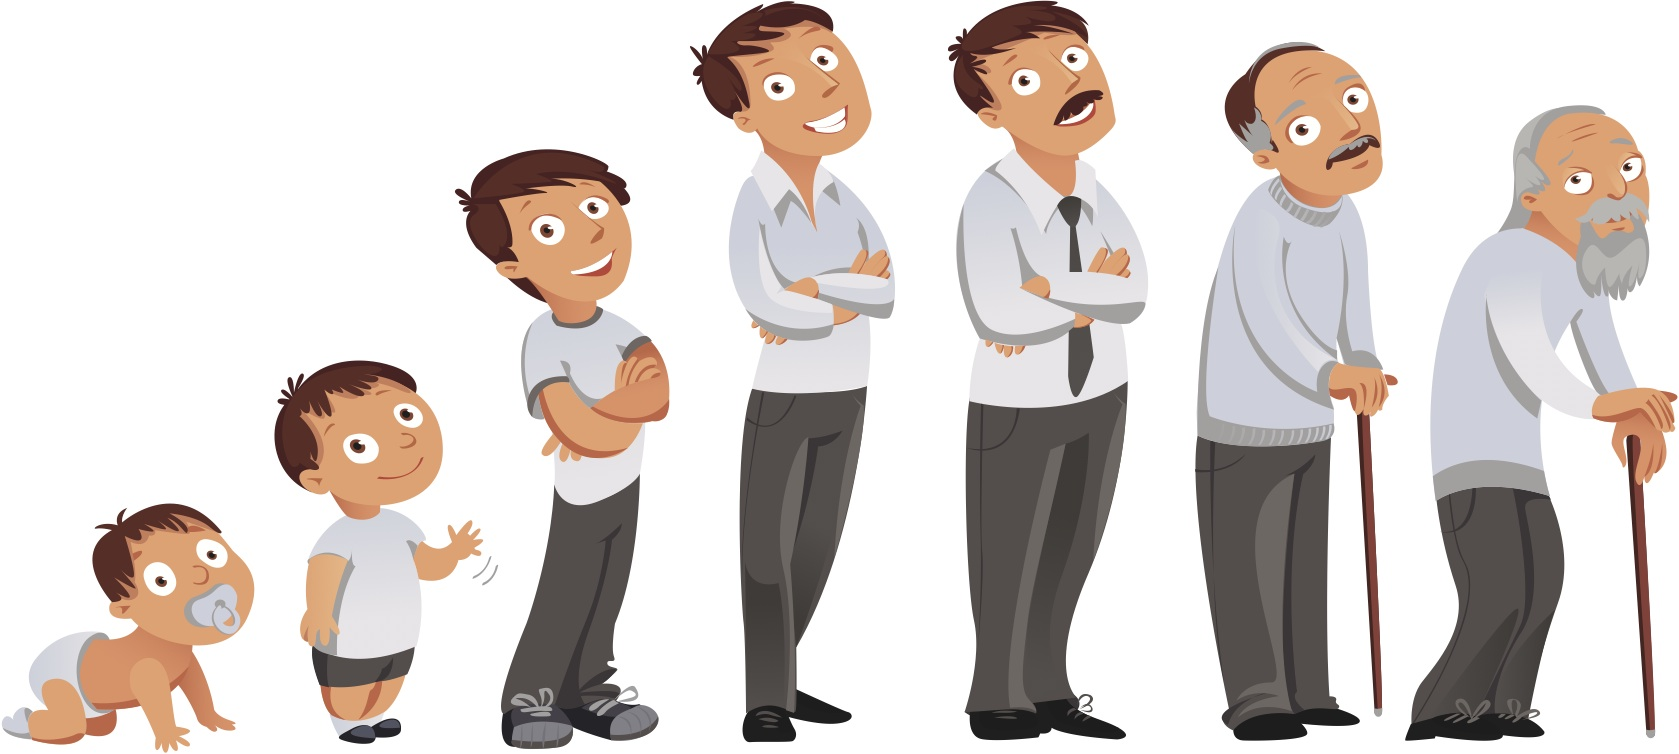

In [1]:
from IPython import display
display.Image('/content/Life-expectancy.jpg')


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d kumarajarshi/life-expectancy-who

Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
License(s): other
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 320MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/life-expectancy-who.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
%matplotlib inline

In [6]:
df=pd.read_csv('/content/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.shape

(2938, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [14]:
df.rename(columns={'Life expectancy ':'Life expectancy','Adult Mortality':'Adult mortality','percentage expenditure':'Percentage expenditure','under-five deaths ':'Under-five deaths','Measles ':'Measles', ' BMI ':'BMI'},inplace=True)
df

,Country,Year,Status,Life expectancy,Adult mortality,infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
Percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
Under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03


In [16]:
df.select_dtypes(include=['float64','int64']).corr()

,Year,Life expectancy,Adult mortality,infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
Percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
Under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


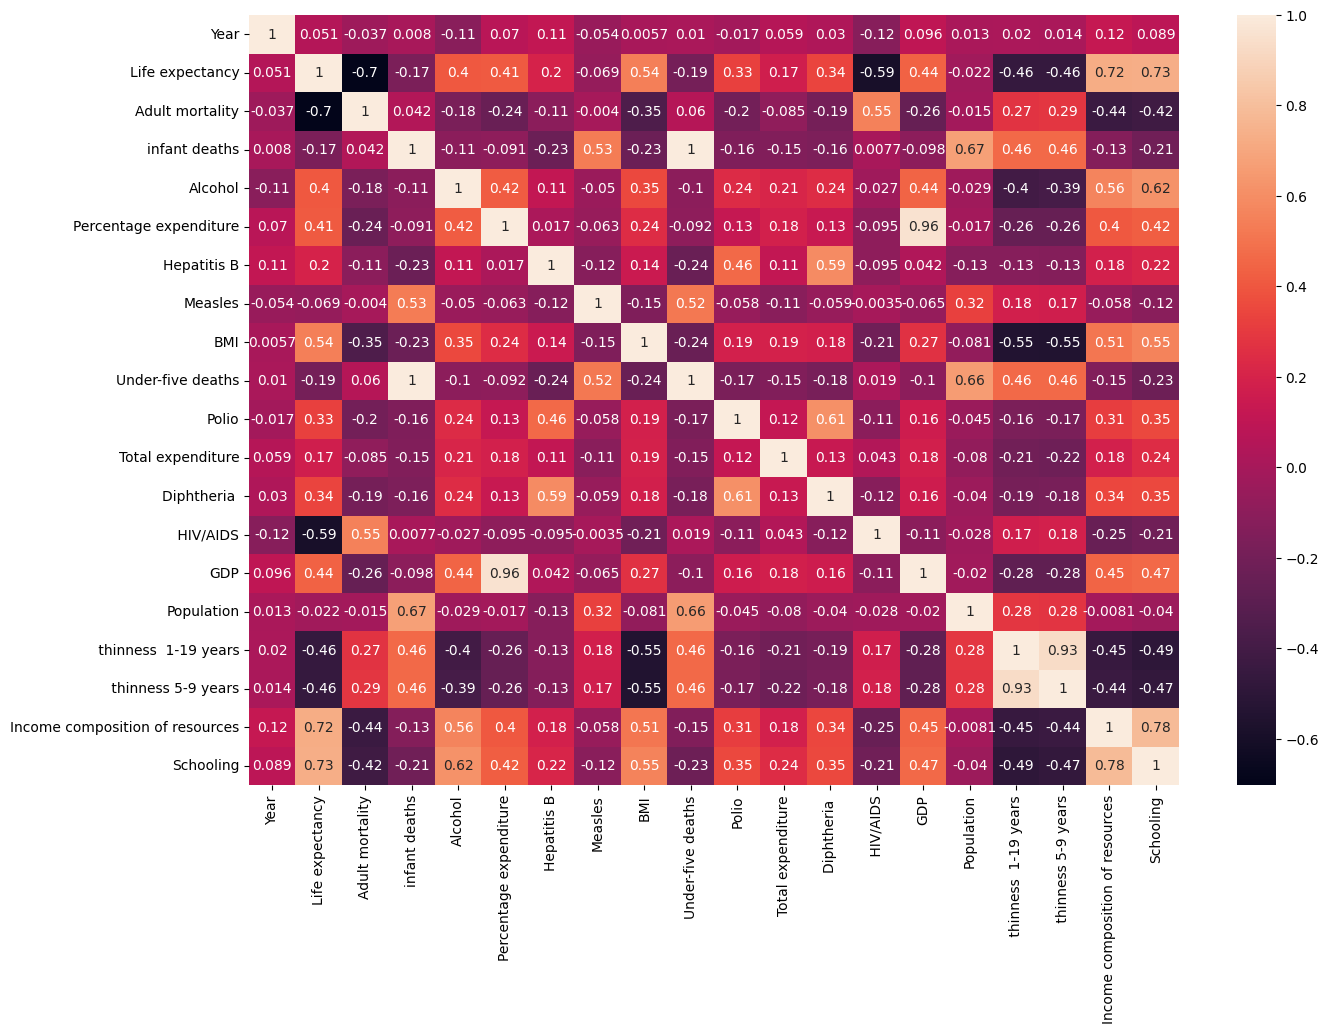

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),annot=True)
plt.show()

Data visualization

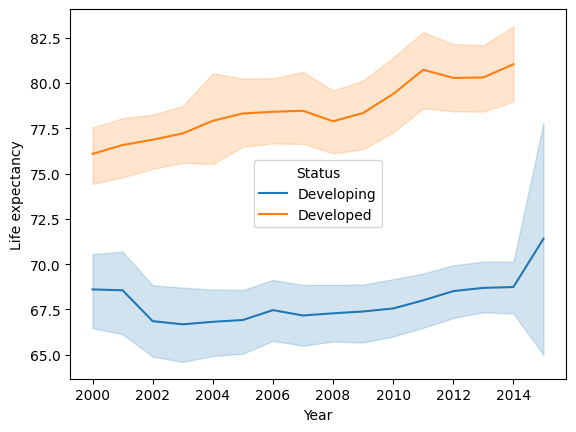

In [18]:
sns.lineplot(data=df,x='Year',y='Life expectancy', hue='Status')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.show()

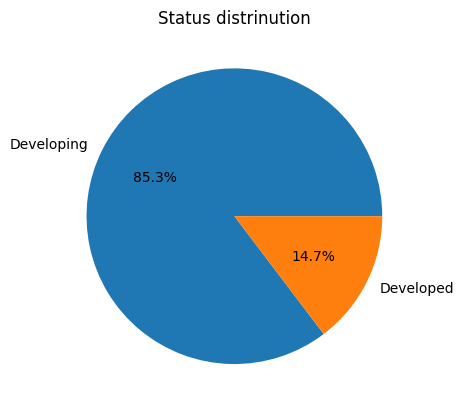

In [19]:
data=df['Status'].value_counts()
plt.pie(data.values,labels=data.index,autopct='%1.1f%%')
plt.title('Status distrinution')
plt.show()

Text(0.5, 1.0, 'Life expectancy vs GDP')

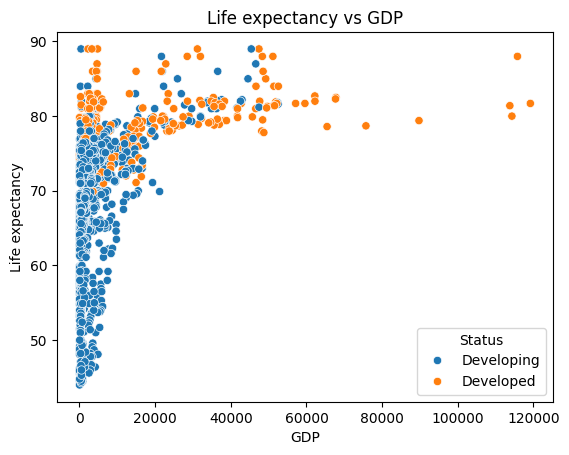

In [20]:
sns.scatterplot(data=df,x='GDP',y='Life expectancy',hue='Status')
plt.title('Life expectancy vs GDP')

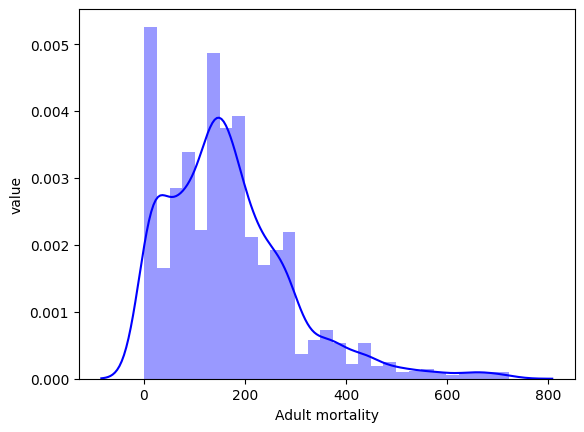

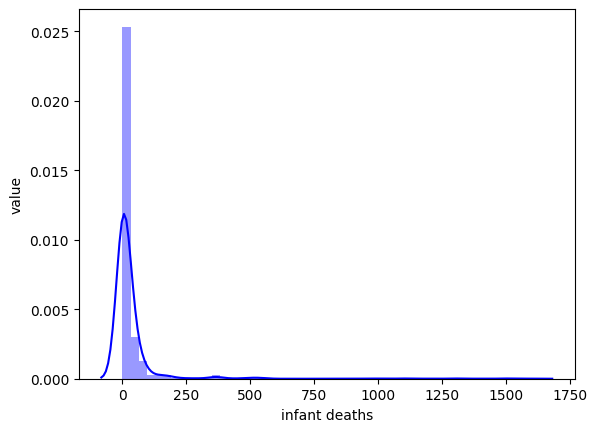

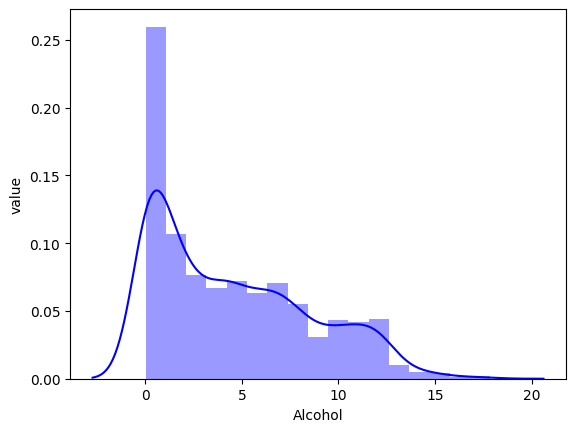

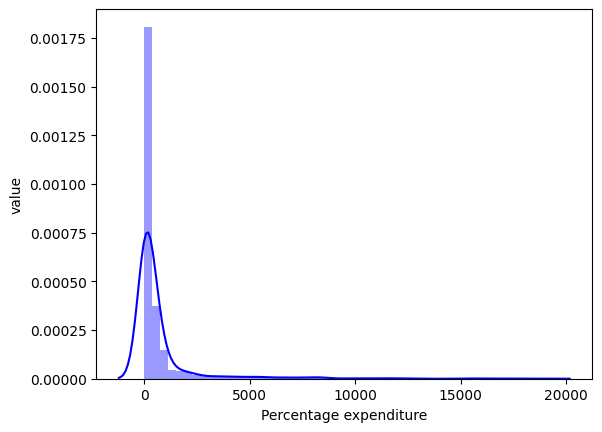

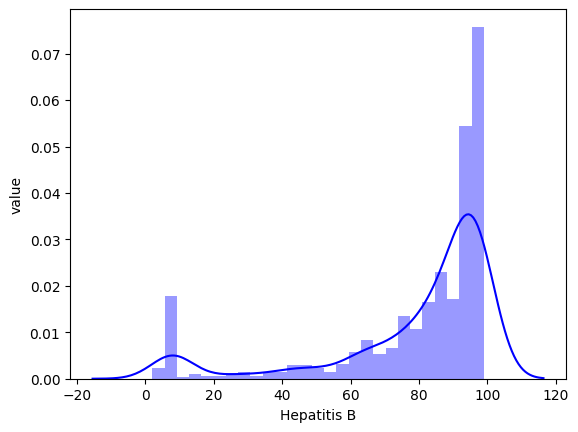

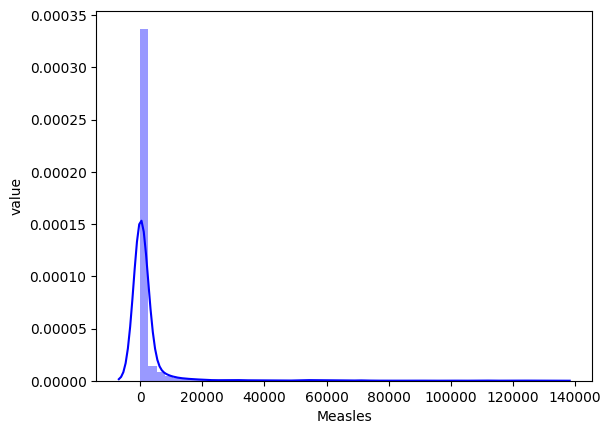

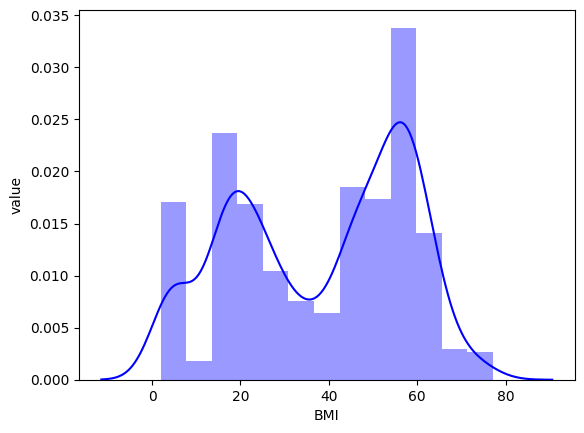

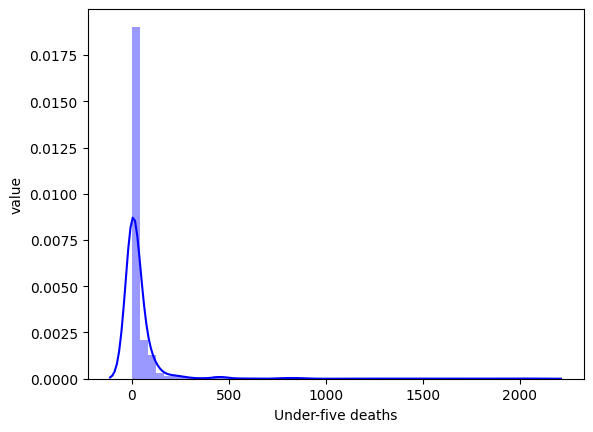

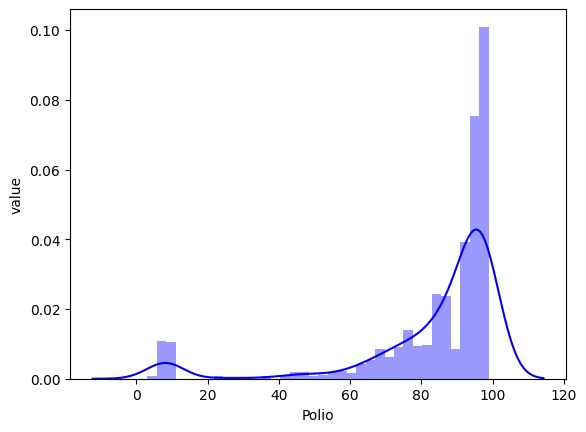

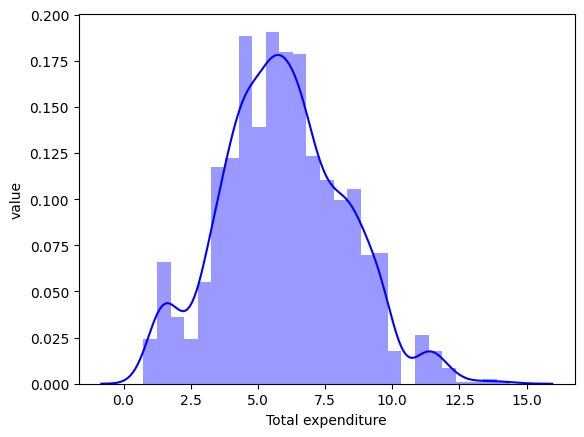

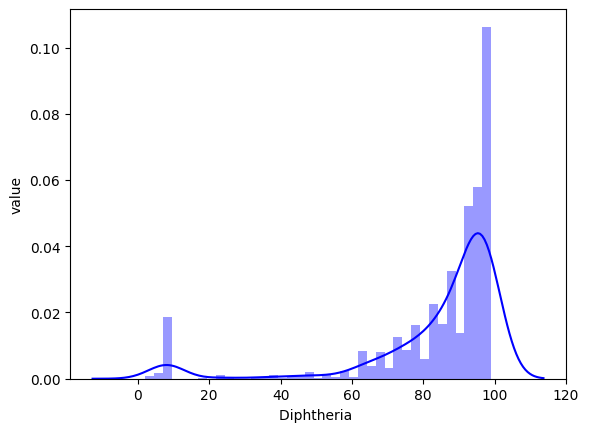

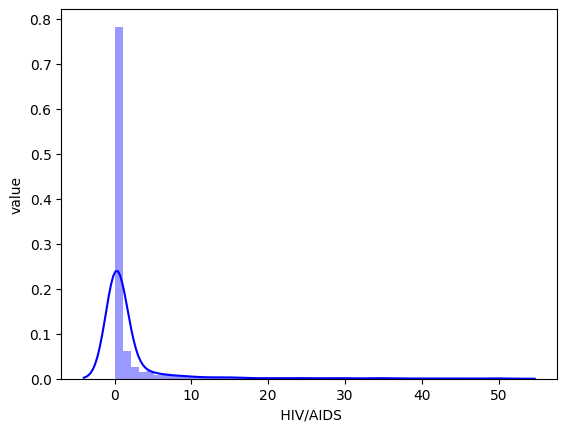

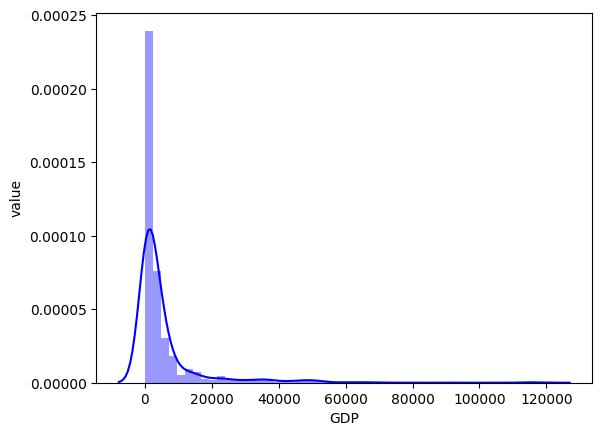

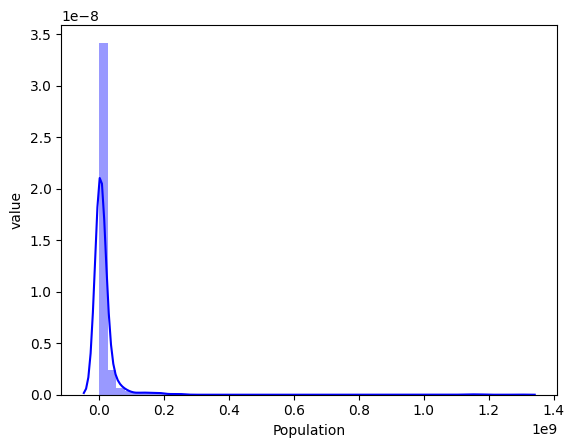

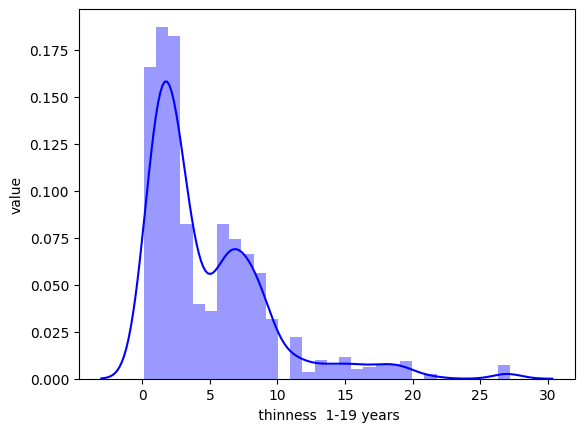

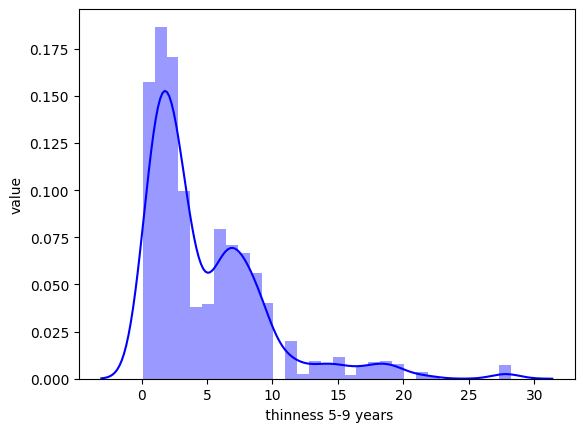

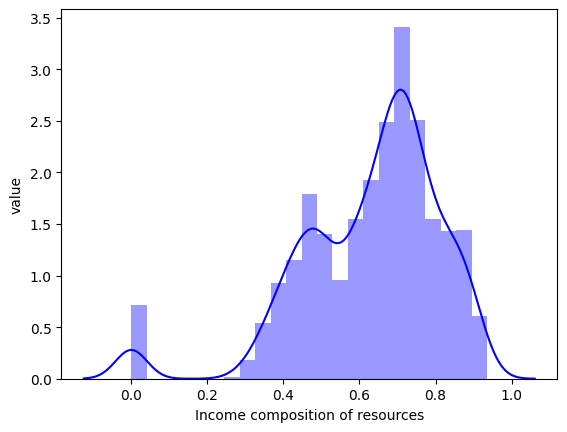

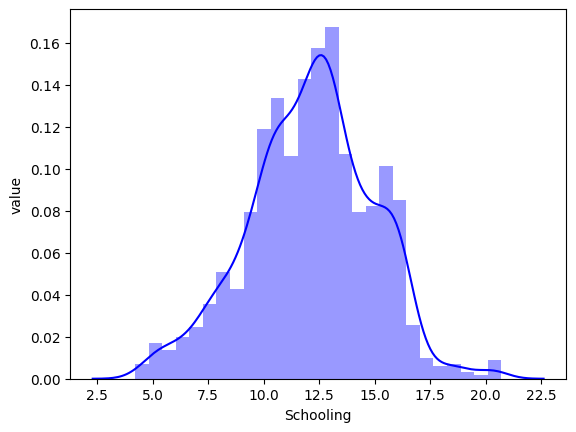

In [21]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for i in df1.columns:
  sns.distplot(df1[i],color='blue')
  plt.xlabel(i)
  plt.ylabel('value')
  plt.show()

VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
v=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
vif = pd.DataFrame({'variables':v.columns})
vif['vif']=[variance_inflation_factor(v.values,i) for i in range (len(v.columns))]
vif


,variables,vif
0,Adult mortality,4.160178
1,infant deaths,222.073491
2,Alcohol,4.070163
3,Percentage expenditure,14.825787
4,Hepatitis B,17.396978
5,Measles,1.571070
6,BMI,8.287476
7,Under-five deaths,210.862351
8,Polio,24.893553
9,Total expenditure,8.139036


Outliers

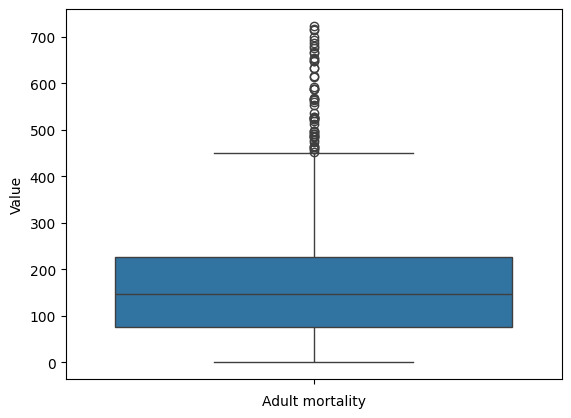

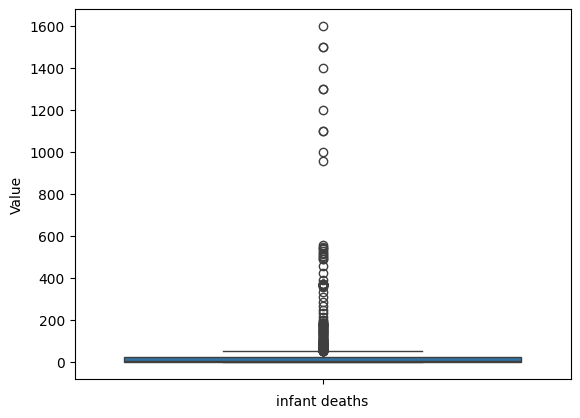

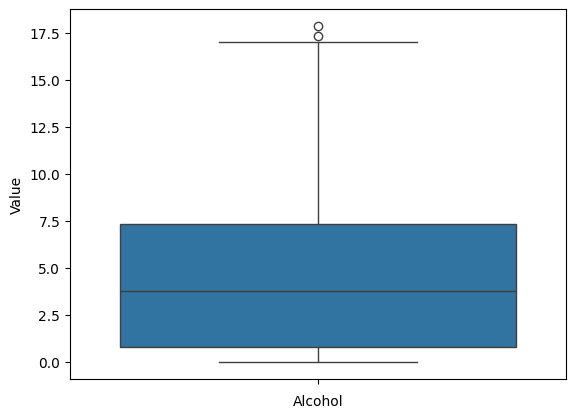

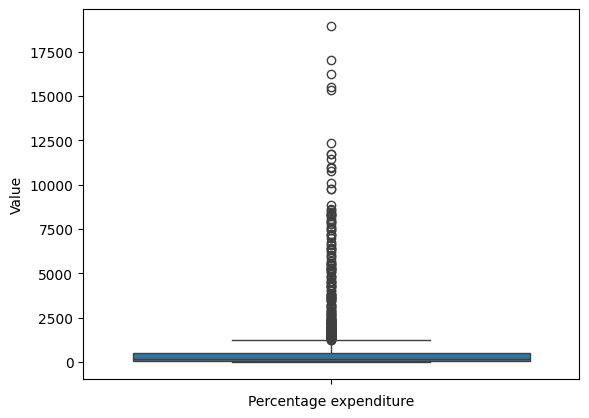

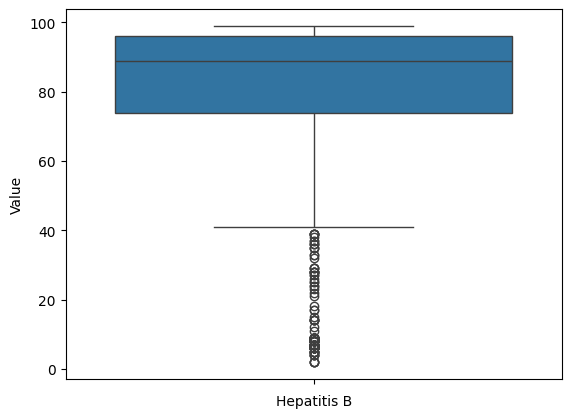

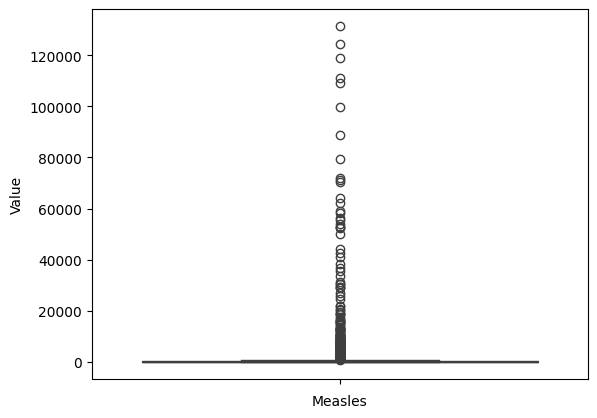

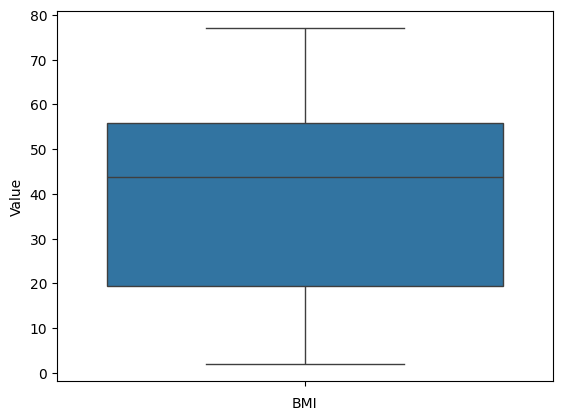

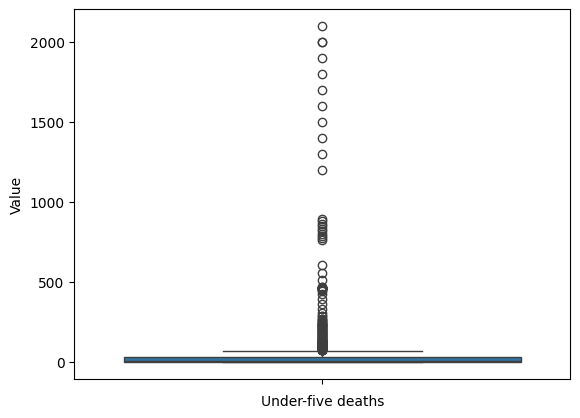

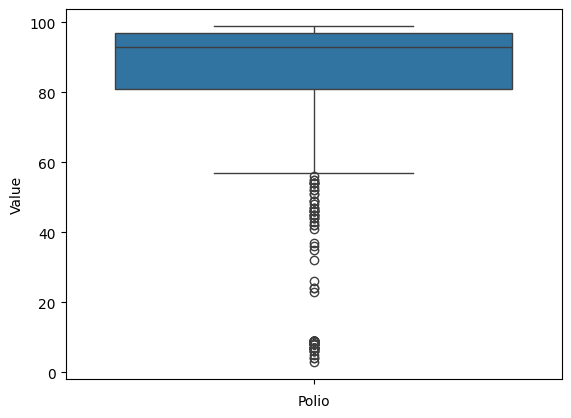

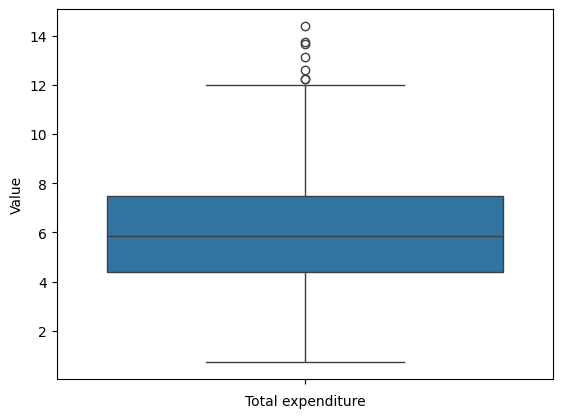

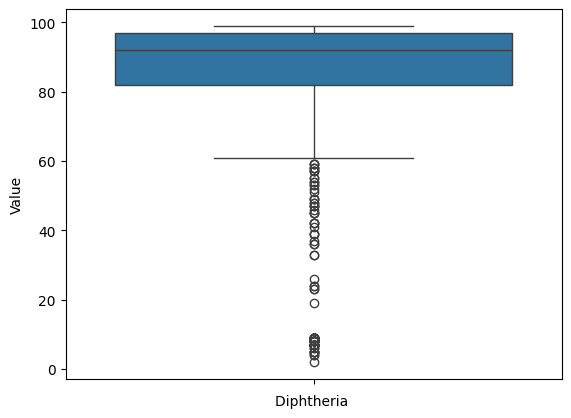

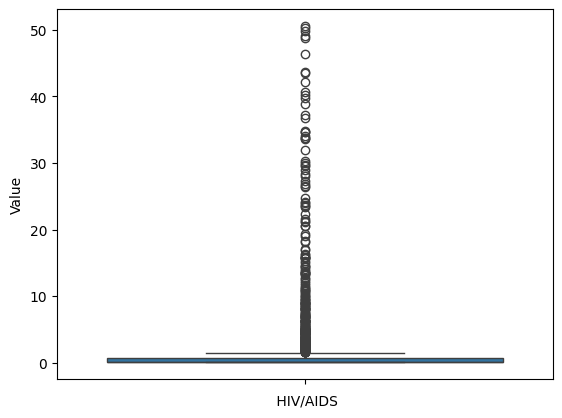

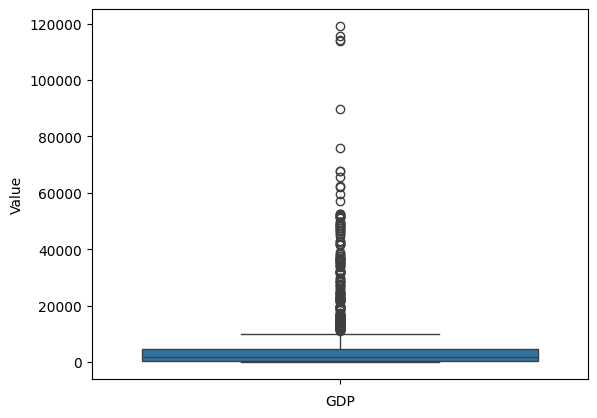

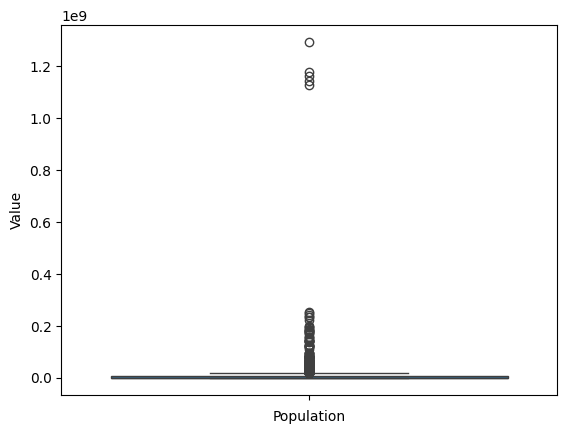

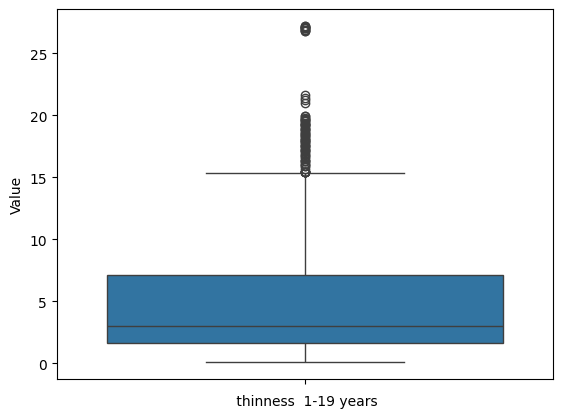

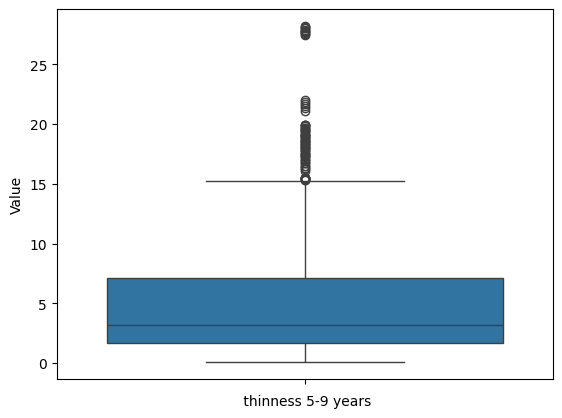

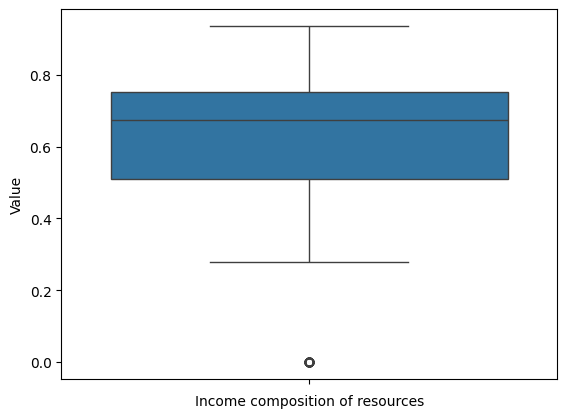

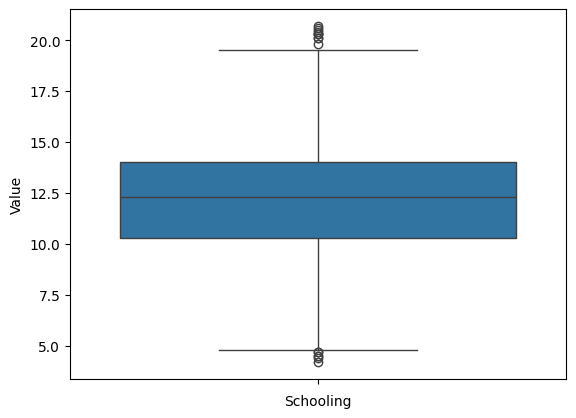

In [24]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for o in df1.columns:
  sns.boxplot(df1[o])
  plt.xlabel(o)
  plt.ylabel('Value')
  plt.show()

Outlier treatment

In [25]:
for z in df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy']).columns:
  q1=np.percentile(df[z],25)
  q3=np.percentile(df[z],75)
  iqr=q3-q1
  lf=q1-(1.5*iqr)
  uf=q3+(1.5*iqr)
  df[z]=np.where(df[z]>uf,uf,np.where(df[z]<lf,lf,df[z]))

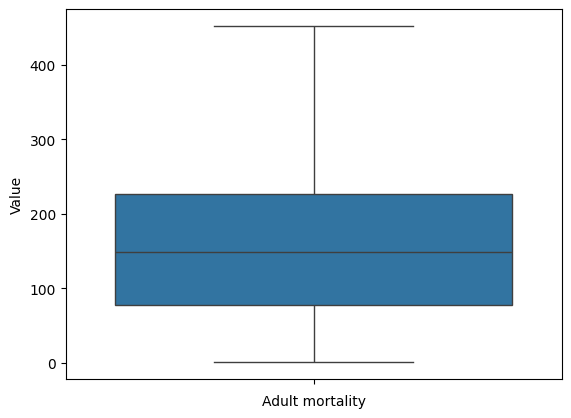

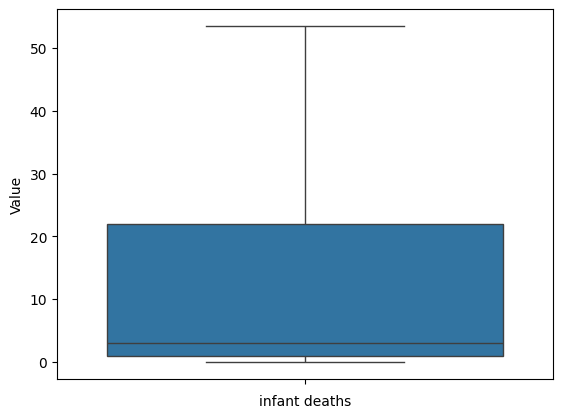

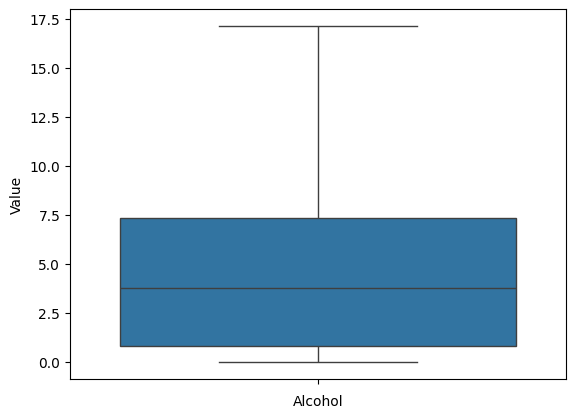

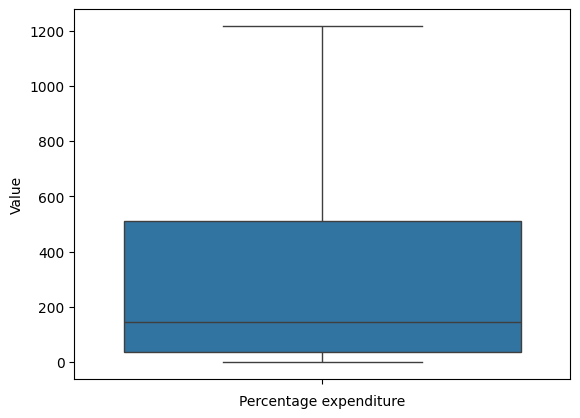

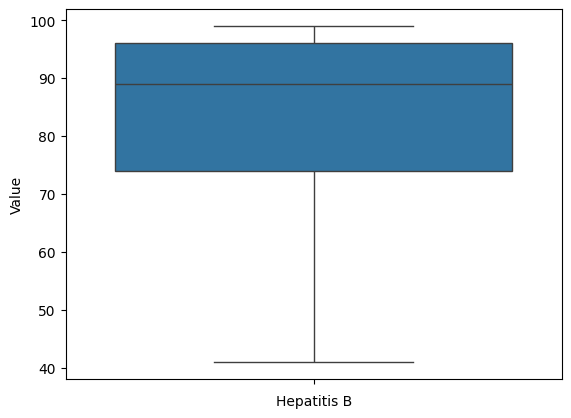

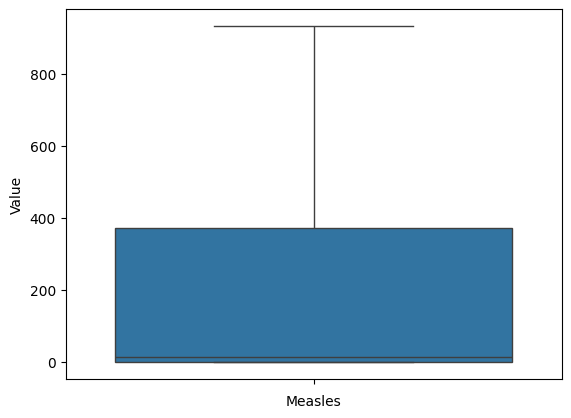

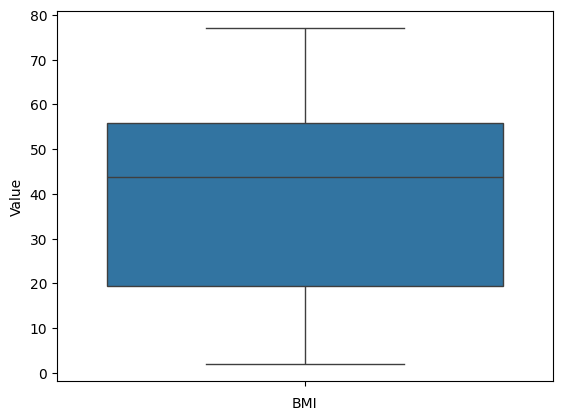

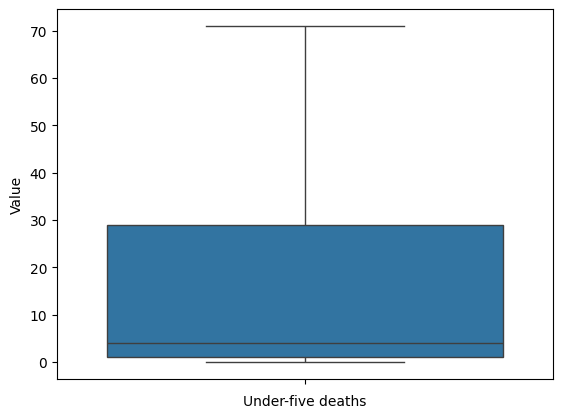

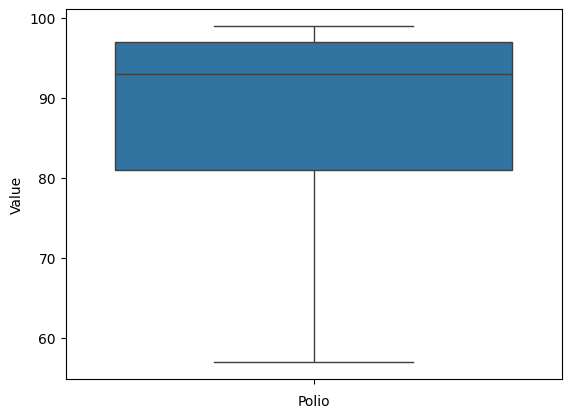

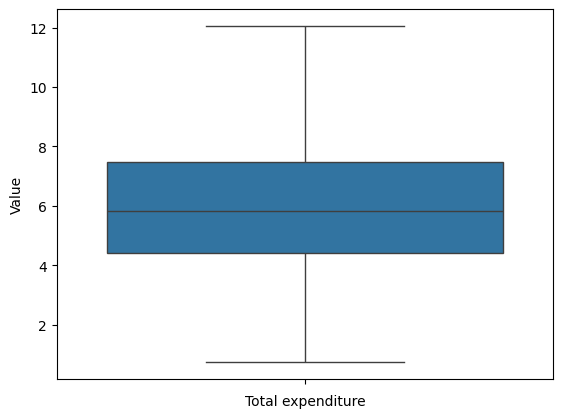

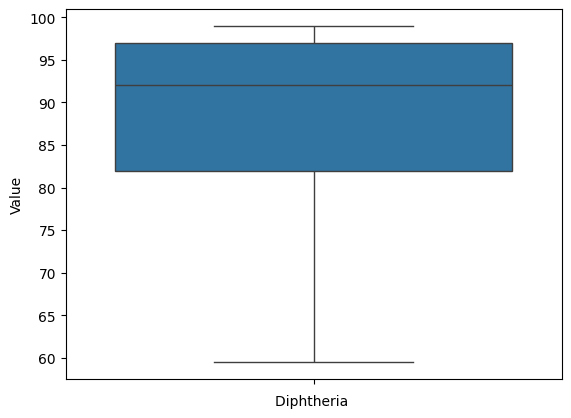

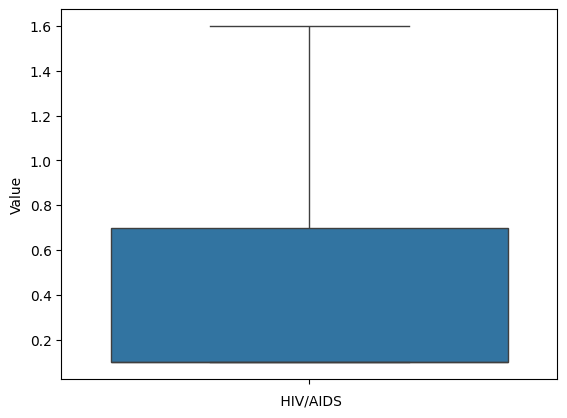

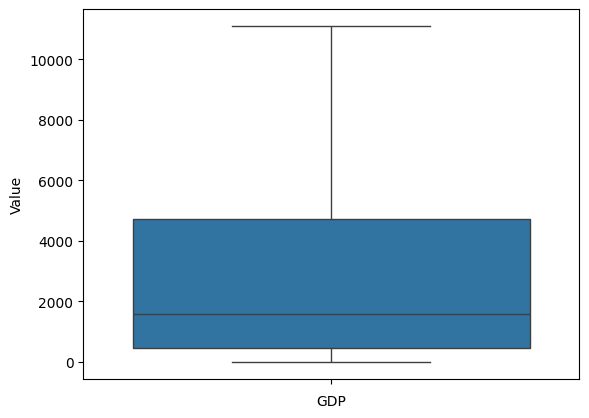

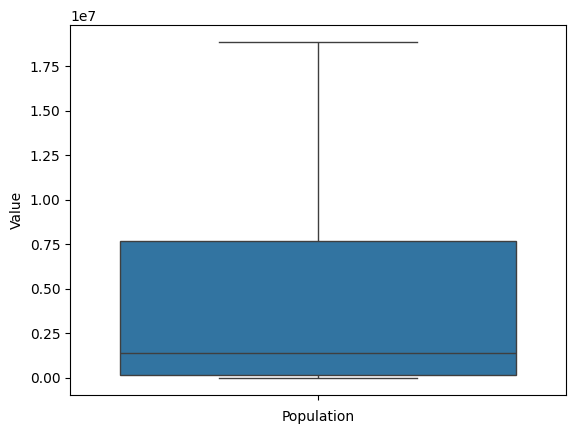

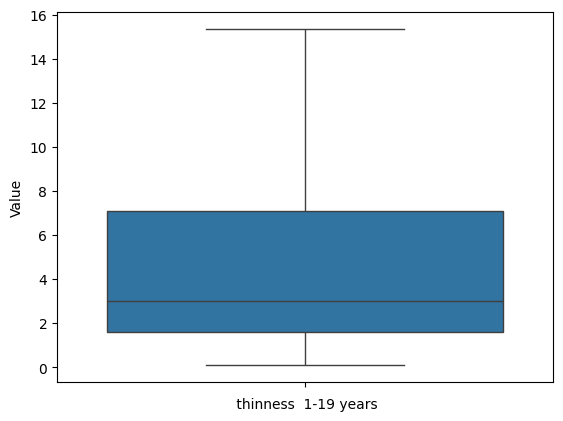

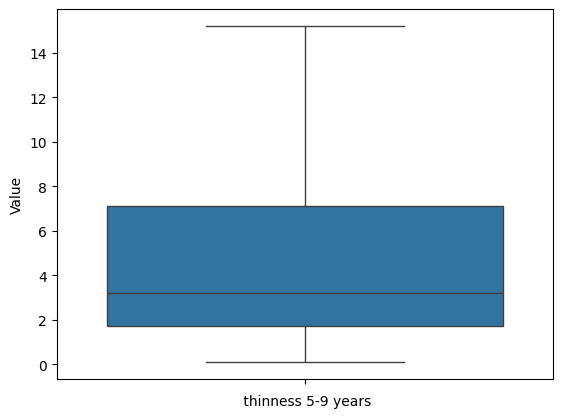

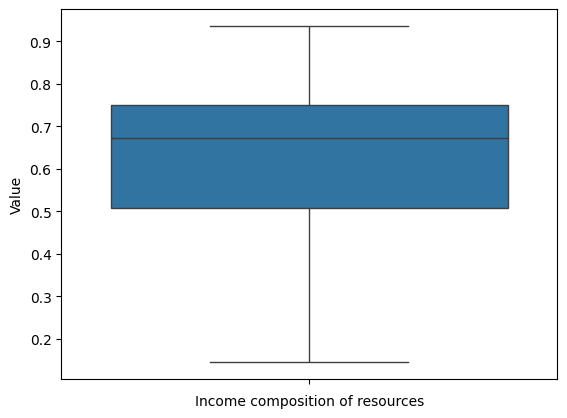

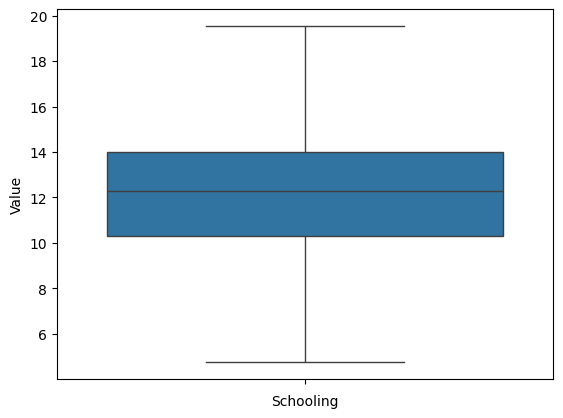

In [26]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for o in df1.columns:
  sns.boxplot(df1[o])
  plt.xlabel(o)
  plt.ylabel('Value')
  plt.show()

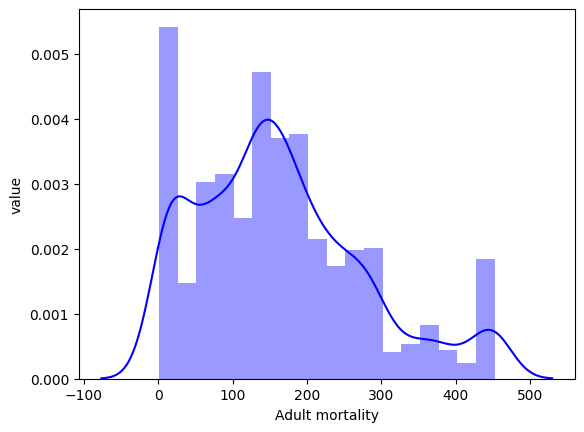

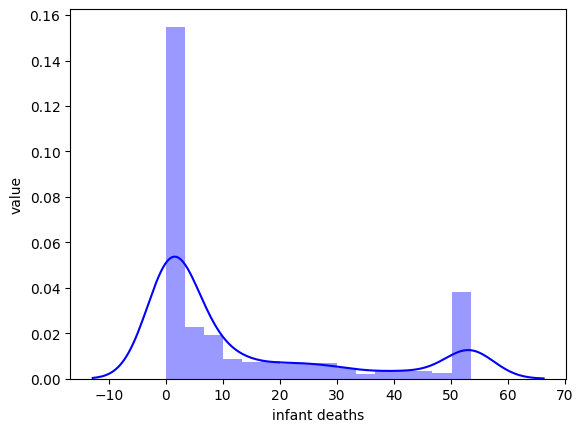

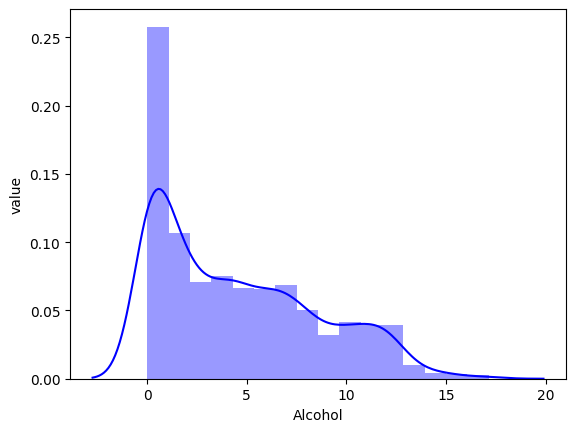

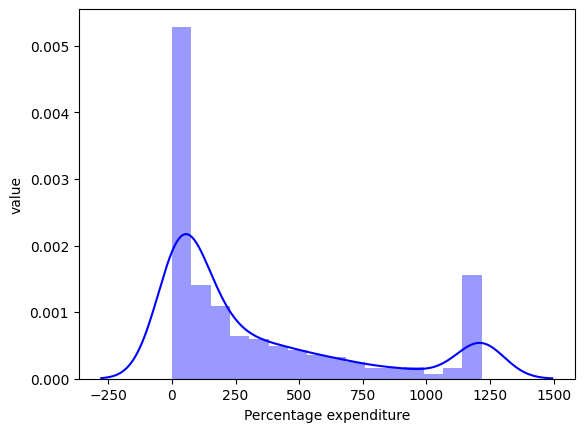

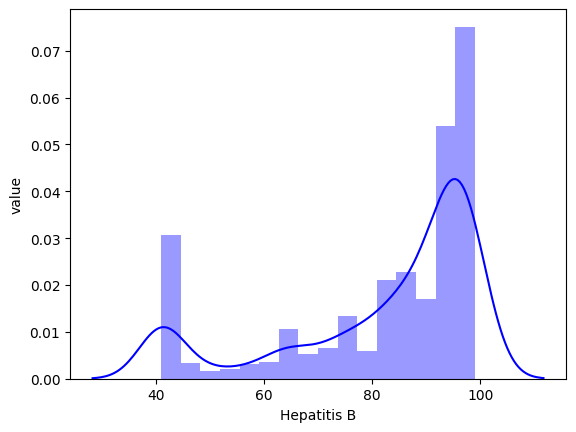

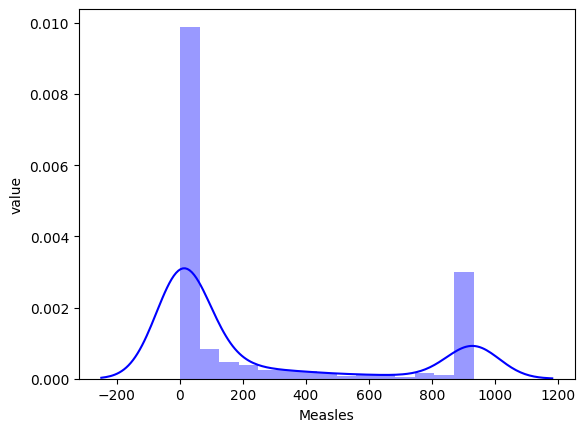

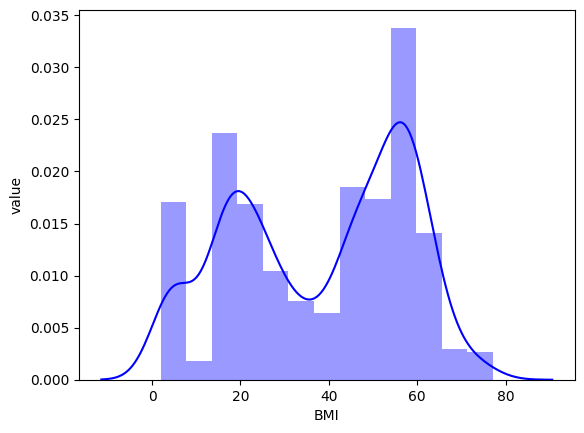

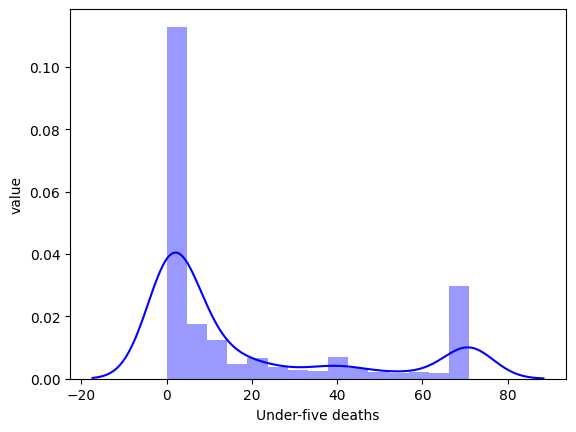

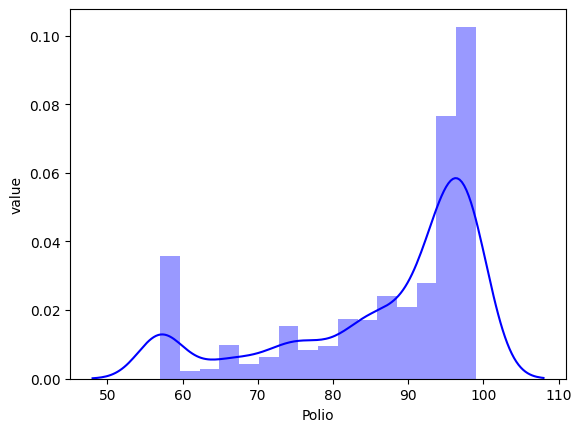

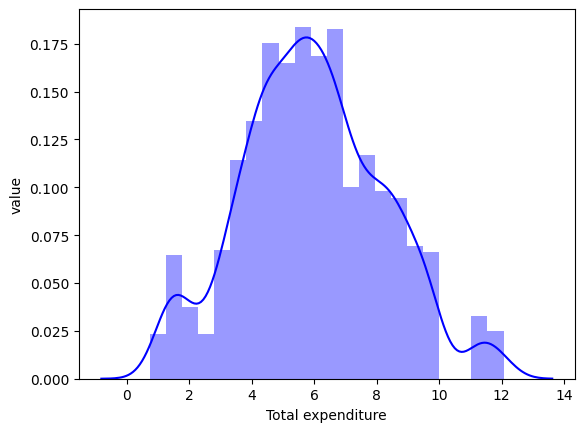

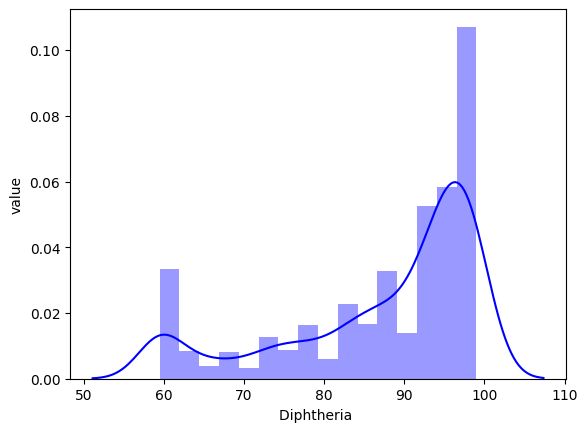

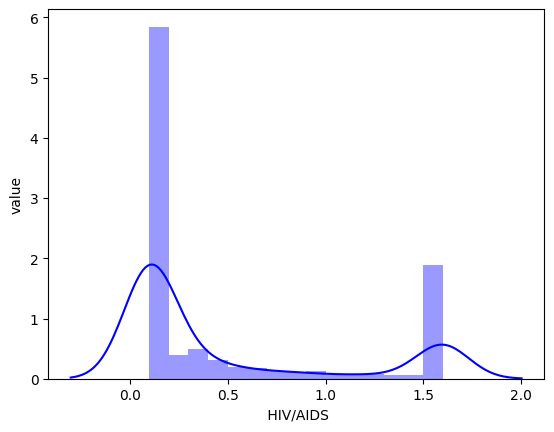

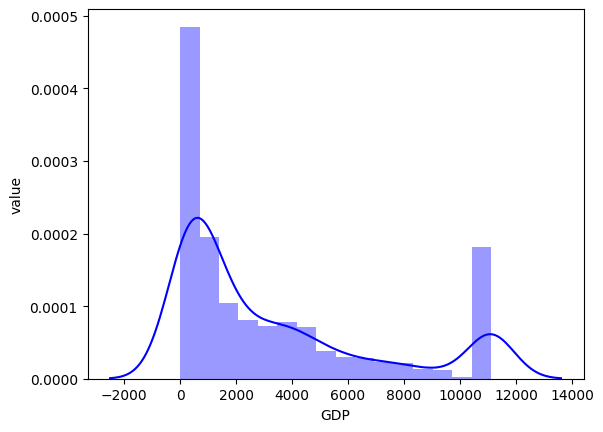

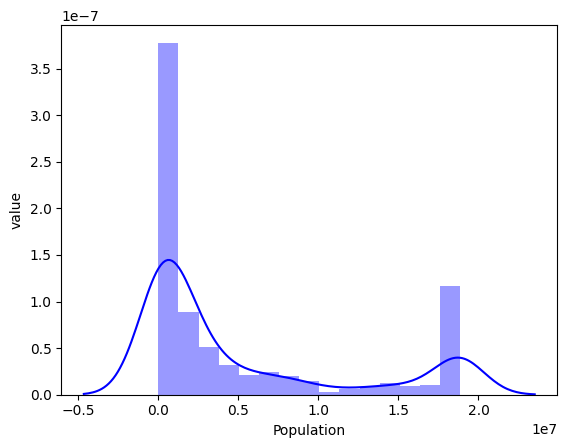

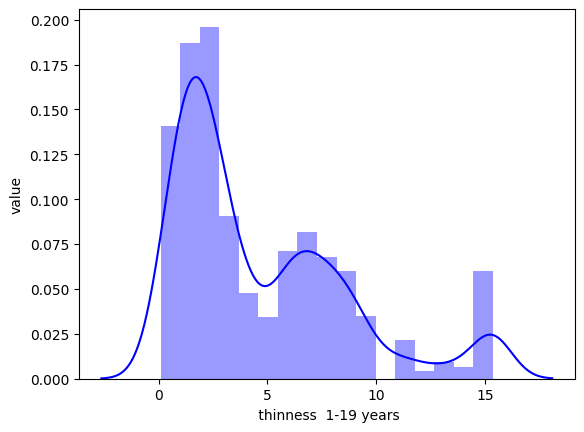

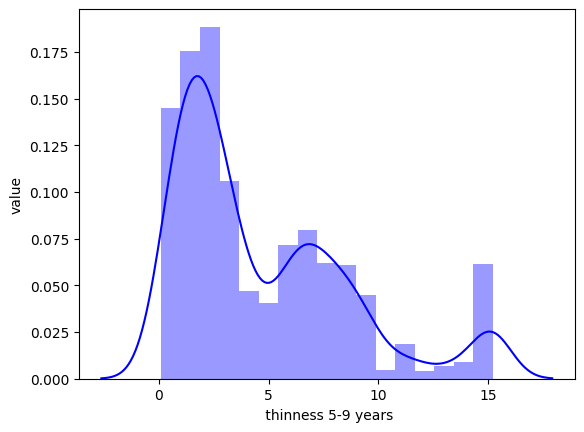

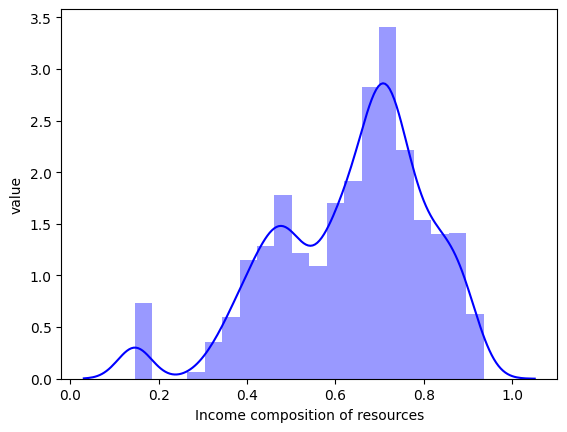

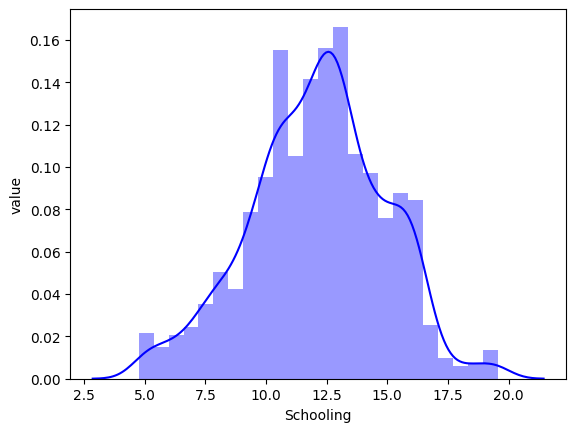

In [27]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for i in df1.columns:
  sns.distplot(df1[i],color='blue')
  plt.xlabel(i)
  plt.ylabel('value')
  plt.show()

In [28]:
df=df.drop(columns=['Year','Country'])

Feature Engineering and Preprocessing

In [29]:
encoded_df=pd.get_dummies(df,columns=['Status'],drop_first=False)
# Find dummy columns created by get_dummies
dummy_cols = [col for col in encoded_df.columns if col.startswith('Status_')]

# Convert only those columns to int
encoded_df[dummy_cols] = encoded_df[dummy_cols].astype(int)
encoded_df

,Life expectancy,Adult mortality,infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,65.0,263.0,53.5,0.01,71.279624,65.0,932.5,19.1,71.0,57.0,...,65.0,0.1,584.259210,18859584.5,15.35,15.2,0.479,10.1,0,1
1,59.9,271.0,53.5,0.01,73.523582,62.0,492.0,18.6,71.0,58.0,...,62.0,0.1,612.696514,327582.0,15.35,15.2,0.476,10.0,0,1
2,59.9,268.0,53.5,0.01,73.219243,64.0,430.0,18.1,71.0,62.0,...,64.0,0.1,631.744976,18859584.5,15.35,15.2,0.470,9.9,0,1
3,59.5,272.0,53.5,0.01,78.184215,67.0,932.5,17.6,71.0,67.0,...,67.0,0.1,669.959000,3696958.0,15.35,15.2,0.463,9.8,0,1
4,59.2,275.0,53.5,0.01,7.097109,68.0,932.5,17.2,71.0,68.0,...,68.0,0.1,63.537231,2978599.0,15.35,15.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,452.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,...,65.0,1.6,454.366654,12777511.0,9.40,9.4,0.407,9.2,0,1
2934,44.5,452.0,26.0,4.06,0.000000,41.0,932.5,26.7,41.0,57.0,...,68.0,1.6,453.351155,12633897.0,9.80,9.9,0.418,9.5,0,1
2935,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,...,71.0,1.6,57.348340,125525.0,1.20,1.3,0.427,10.0,0,1
2936,45.3,452.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,...,75.0,1.6,548.587312,12366165.0,1.60,1.7,0.427,9.8,0,1


In [30]:
from sklearn.model_selection import cross_val_score, train_test_split

train_df, test_df = train_test_split(encoded_df,train_size=0.8, random_state=42)

In [31]:
# feature scaling of numerical columns
from sklearn.preprocessing import StandardScaler
import joblib
numerical_cols = encoded_df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove("Life expectancy")
#scaled_df = encoded_df.copy()
scaler=StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])
#saving the scaler file
joblib.dump(scaler, "scaler.pkl")

train_df

,Life expectancy,Adult mortality,infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
1014,61.2,0.851507,1.375733,-0.709405,-0.278647,0.504294,-0.344564,-0.596853,1.531474,0.349342,...,0.322083,1.358600,-0.461898,1.984571,0.549495,0.516447,-0.453108,-0.428930,-0.410232,0.410232
93,74.1,-0.233256,-0.105480,0.813648,0.322317,-0.836438,-0.669759,0.864909,-0.223398,0.574626,...,0.485212,-0.662255,-0.188543,-0.210414,-0.868235,-0.931361,0.833805,1.504003,-0.410232,0.410232
2015,74.0,-0.276647,-0.158381,-0.055257,0.435699,0.611553,-0.669759,-1.650330,-0.145404,0.499531,...,0.485212,-0.325446,0.092381,1.984571,-0.868235,-0.881436,0.370052,0.394356,-0.410232,0.410232
2929,48.2,2.491670,0.846728,-0.235456,-0.780042,-0.353774,-0.669759,-0.470839,1.063508,-0.852175,...,-0.982946,1.863814,-0.801968,1.212483,0.773347,0.766069,-1.224096,-0.858471,-0.410232,0.410232
2583,71.2,0.252718,0.159022,0.347105,-0.399249,0.718811,1.857271,-0.934571,0.049582,0.799910,...,0.729905,0.516577,-0.375291,1.984571,1.146434,1.215388,0.097598,-0.321545,-0.410232,0.410232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,64.2,0.122546,2.089889,-1.106830,-0.732143,-0.192886,1.857271,-0.929530,2.038437,-0.701985,...,-0.738253,-0.662255,-0.652772,1.538079,2.651217,2.613272,-0.760343,-2.003913,-0.410232,0.410232
2223,65.8,-1.248595,-0.740286,-0.094753,-0.803857,0.879699,-0.669759,-0.591813,-0.730362,0.950100,...,0.893033,0.684982,-0.836295,-0.759664,0.400260,0.366674,-0.574843,-0.715291,-0.410232,0.410232
1528,72.2,0.235362,-0.740286,1.946680,2.155227,0.718811,-0.669759,1.096774,-0.730362,0.875005,...,0.893033,-0.662255,2.131719,-0.301592,-0.470276,-0.457079,1.117853,1.611389,2.437643,-2.437643
2576,73.5,-0.024982,-0.158381,0.347105,0.665196,0.879699,1.857271,-0.617016,-0.223398,0.950100,...,0.974598,-0.325446,0.301293,0.206956,0.947454,0.965766,0.393240,0.286971,-0.410232,0.410232


In [32]:
test_df

,Life expectancy,Adult mortality,infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
1210,67.5,-1.265951,2.089889,-1.099424,-0.579390,-0.300145,1.857271,-1.786425,2.038437,-0.701985,...,-1.146074,-0.493851,-0.385419,1.984571,-0.719001,-0.756625,0.033832,-0.393135,-0.410232,0.410232
2273,73.8,-0.285325,-0.687385,1.181451,1.064880,0.933328,-0.125058,0.864909,-0.691364,0.499531,...,0.566776,-0.662255,0.595124,0.312841,-0.569766,-0.581890,0.642507,0.501742,-0.410232,0.410232
1005,79.1,-0.684518,-0.581584,1.805977,2.155227,0.343406,-0.341854,0.965720,-0.613370,0.724816,...,0.729905,-0.662255,2.131719,0.439560,-0.893108,-0.906398,1.419292,1.539798,2.437643,-2.437643
2926,54.9,2.491670,0.740927,0.366853,-0.674780,0.665182,-0.669759,-0.405312,0.907519,0.499531,...,0.485212,1.863814,-0.661985,1.333104,0.524622,0.491485,-1.044392,-0.715291,-0.410232,0.410232
518,48.6,2.491670,0.159022,-0.729152,-0.731938,-2.123540,-0.639949,-0.914409,0.244567,-2.203881,...,-2.247192,1.863814,-0.768137,-0.755789,1.096689,1.090577,-1.664660,-2.039708,-0.410232,0.410232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,71.0,-1.205205,-0.740286,1.060496,-0.634835,0.879699,-0.669759,0.940517,-0.730362,0.950100,...,0.974598,-0.662255,0.838393,-0.432643,-0.544893,-0.531965,0.833805,1.217643,2.437643,-2.437643
2821,75.4,-0.372106,-0.687385,0.282925,1.333479,0.665182,-0.669759,0.995963,-0.691364,0.649721,...,0.566776,-0.662255,0.230165,-0.713832,-0.743873,-0.781587,0.683085,1.217643,-0.410232,0.410232
483,55.9,1.771387,1.904737,-1.111767,-0.662985,0.182518,0.980602,-0.541407,2.038437,-0.101227,...,-0.167303,1.863814,-0.548823,-0.444403,0.300770,0.291787,-0.789328,-0.607906,-0.410232,0.410232
290,69.1,0.469671,-0.740286,-1.111767,-0.782625,0.826070,-0.669759,-0.768232,-0.691364,0.799910,...,0.811469,0.179768,-0.826411,-0.650845,2.651217,2.613272,-0.250216,0.179586,-0.410232,0.410232


In [33]:
x_train = train_df.drop(['Life expectancy'], axis=1)
y_train = train_df['Life expectancy']
x_test = test_df.drop(['Life expectancy'],axis=1)
y_test = test_df['Life expectancy']

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1319, 20), (330, 20), (1319,), (330,))

In [35]:
# Building the models

import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define models
models = {
    'Linear': LinearRegression(),
    'L1 (Lasso)': Lasso(alpha=0.1),
    'L2 (Ridge)': Ridge(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Support Vector (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    }

# Store results in a list
results = []
###  r2 and adj r2 score parameters
n_train = x_train.shape[0]
n_test = x_test.shape[0]
p = x_train.shape[1]
# Evaluate the model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Calculate R² scores first
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    relative_diff = ((RMSE_test - RMSE_train) / RMSE_train) * 100
    results.append({
        'Model': name,
        'R² Train(%)': r2_train*100,
        #'Adjusted R² Train': 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1),
        'R² Test(%)': r2_test*100,
        #'Adjusted R² Test': 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1),
        'MAE Train': MAE_train,
        'MAE Test': MAE_test,
        'RMSE Train': RMSE_train,
        'RMSE Test': RMSE_test,
        'Relative_diff' : relative_diff,

    })
# Convert to DataFrame
results_df = pd.DataFrame(results)

#If relative difference > 10–20%, you can consider the model overfitting.

relative_diff = ((RMSE_test - RMSE_train) / RMSE_train) * 100
results_df['Overfitting Flag'] = results_df['Relative_diff'].apply(lambda x: 'Yes' if x > 20 else 'No')

# Round for better readability
results_df = results_df.round(2)

In [36]:
print(results_df.to_string(index=False))

               Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test  RMSE Train  RMSE Test  Relative_diff Overfitting Flag
              Linear        83.46       83.55       2.63      2.50        3.61       3.42          -5.32               No
          L1 (Lasso)        82.95       83.54       2.64      2.49        3.67       3.42          -6.73               No
          L2 (Ridge)        83.46       83.55       2.63      2.50        3.61       3.42          -5.32               No
          ElasticNet        83.02       83.23       2.64      2.51        3.66       3.45          -5.66               No
Support Vector (SVR)        86.39       85.36       2.16      2.22        3.28       3.22          -1.54               No
       Decision Tree       100.00       85.02       0.00      1.85        0.00       3.26            inf              Yes
       Random Forest        99.35       94.35       0.45      1.19        0.72       2.00         179.19              Yes
   Gradient Boosting    

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform

In [38]:
rf = RandomForestRegressor(random_state=42)

rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    rf,
    param_distributions=rf_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)
print("Random Forest Best Params:", rf_random.best_params_)
# Train RMSE
rmse_train = mean_squared_error(y_train, rf_random.predict(x_train)) ** 0.5
print("Random Forest Hypertuning Train RMSE:", round(rmse_train, 3))

# Test RMSE
rmse_test = mean_squared_error(y_test, rf_random.predict(x_test)) ** 0.5
print("Random Forest Hypertuning Test RMSE:", round(rmse_test, 3))

# Train R2
r2_score_train = r2_score(y_train, rf_random.predict(x_train))
print("Random Forest Hypertuning Train R2 score:", round(r2_score_train, 3))

# Test R2
r2_score_test = r2_score(y_test, rf_random.predict(x_test))
print("Random Forest Hypertuning Test R2 score:", round(r2_score_test, 3))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Best Params: {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 223}
Random Forest Hypertuning Train RMSE: 0.787
Random Forest Hypertuning Test RMSE: 2.003
Random Forest Hypertuning Train R2 score: 0.992
Random Forest Hypertuning Test R2 score: 0.943


Deep learning model

In [39]:
import tensorflow
from keras.layers import Dense

In [40]:
x_train.columns

Index(['Adult mortality', 'infant deaths', 'Alcohol', 'Percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

In [41]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model=keras.Sequential()
model.add(Dense(256,input_dim=20,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,969 (171.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 768 (3.00 KB)

In [43]:
model.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.

In [44]:
history1 = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 67.8080 - val_loss: 66.5994
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 59.3397 - val_loss: 57.2211
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.2511 - val_loss: 37.1567
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1110 - val_loss: 26.1547
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.5062 - val_loss: 18.1081
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.9161 - val_loss: 12.3828
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3276 - val_loss: 7.7754
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1822 - val_loss: 5.7402
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.6265 - val_loss: 3.3637
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1005 - val_loss: 5.7028
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6398 - val_loss: 5.7259
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [45]:
y_pred = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9116353518624314

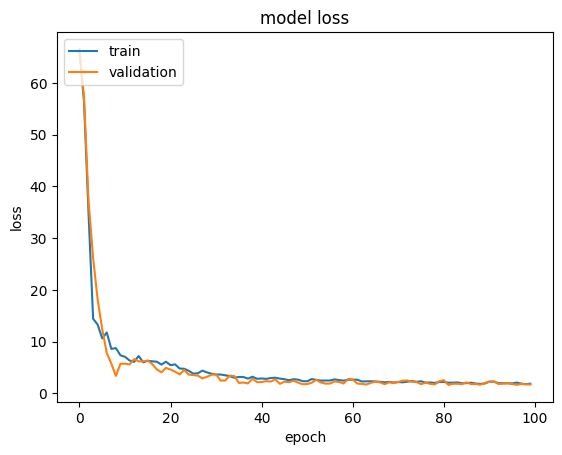

In [47]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model with Dropout Layer

In [48]:
from tensorflow.keras.layers import Dense, Dropout
modeld=keras.Sequential()
model.add(Dense(256,input_dim=20,activation='relu',kernel_regularizer=l2(0.001)))
modeld.add(Dropout(0.1))
model.add(BatchNormalization())
modeld.add(Dense(128,activation='relu'))
modeld.add(Dropout(0.1))
model.add(BatchNormalization())
modeld.add(Dense(32,activation='relu'))
modeld.add(Dense(1,activation='linear'))

modeld.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.
history2 = modeld.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 67.1050 - val_loss: 59.8779
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.3921 - val_loss: 28.5204
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.3889 - val_loss: 13.4353
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.2991 - val_loss: 9.8920
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8678 - val_loss: 8.4489
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5590 - val_loss: 7.4143
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3913 - val_loss: 6.6922
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2772 - val_loss: 6.1030
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6981 - val_loss: 5.9410
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6379 - val_loss: 5.6402
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2392 - val_loss: 5.4889
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

In [49]:
y_pred_d = modeld.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_d)

0.8442439350867182

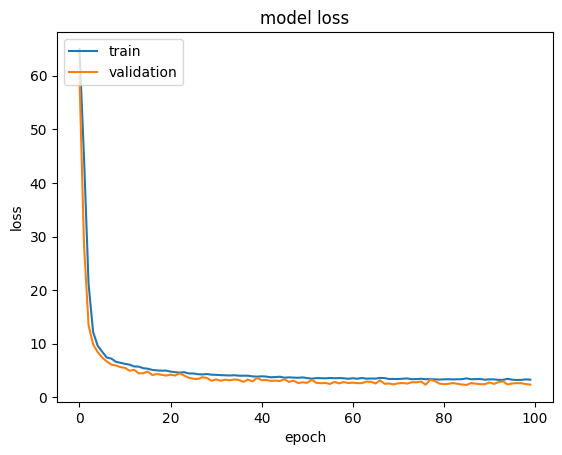

In [51]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Early Stopping and modelCheckpoint

In [52]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model=keras.Sequential()
model.add(Dense(256,input_dim=20,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))


In [53]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
# Early stopping to prevent overfitting
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

# Save best model during training
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
# Compile and train the model
model.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.
history3 = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, callbacks=[checkpoint,callback])

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 67.3035
Epoch 1: val_loss improved from inf to 66.38673, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 67.2565 - val_loss: 66.3867
Epoch 2/100
24/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.7051 
Epoch 2: val_loss improved from 66.38673 to 55.40417, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.7406 - val_loss: 55.4042
Epoch 3/100
23/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.6779 
Epoch 3: val_loss improved from 55.40417 to 34.75043, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.2939 - val_loss: 34.7504
Epoch 4/100
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6241
Epoch 4: val_loss improved from 34.75043 to 27.27858, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5543 - val_loss: 27.2786
Epoch 5/100
25/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.4275
Epoch 5: val_loss 

In [54]:
y_pred_e = modeld.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_e)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.8442439350867182

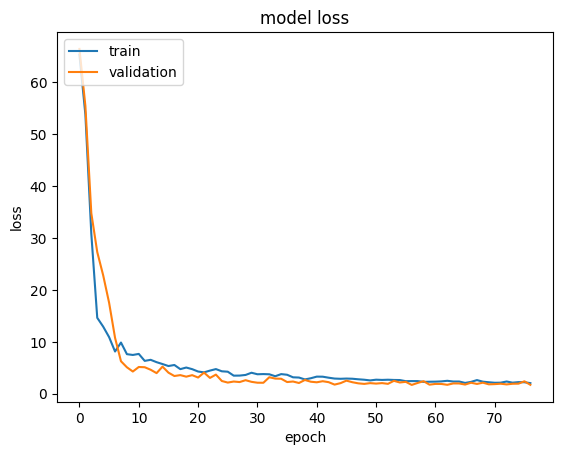

In [55]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

KerasTuner to tune to best parameters (No. of hidden layers, optimizers, loss function, activation functions etc.)

In [57]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.5 MB/s eta 0:00:00


In [58]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model = Sequential()

    # Tune number of hidden layers: 1 to 3
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune number of units in each layer: 8 to 64 with step 8
        units = hp.Int(f'units_{i}', min_value=8, max_value=64, step=8)

        # Tune activation function
        activation = hp.Choice(f'act_{i}', ['relu', 'tanh', 'elu'])

        if i == 0:
            # First layer with input shape
            model.add(Dense(units=units, activation=activation, input_dim=x_train.shape[1]))
        else:
            model.add(Dense(units=units, activation=activation))

    # Output layer for regression (linear activation)
    model.add(Dense(1, activation='linear'))

    # Tune optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    if optimizer_choice == 'adam':
        optimizer = Adam(
            hp.Float('adam_lr', 1e-4, 1e-2, sampling='log'))
    else:
        optimizer = RMSprop(
            hp.Float('rmsprop_lr', 1e-4, 1e-2, sampling='log'))

    # Tune loss function choice (mean_absolute_error or mean_squared_error)
    loss_choice = hp.Choice('loss', ['mean_absolute_error', 'mean_squared_error'])

    model.compile(optimizer=optimizer, loss=loss_choice, metrics=['mae'])

    return model


In [59]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',      # Minimize validation loss
    max_trials=20,             # Number of hyperparameter sets to try
    executions_per_trial=2,    # Average results over 2 runs for stability
    directory='keras_tuner_dir',
    project_name='regression_tuning'
)

In [60]:
tuner.search(x_train, y_train,
             epochs=50,
             validation_data=(x_test, y_test),
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Trial 20 Complete [00h 00m 37s]
val_loss: 57.77748107910156

Best val_loss So Far: 2.5948821306228638
Total elapsed time: 00h 10m 56s


In [61]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"Number of layers: {best_hp.get('num_layers')}")
for i in range(best_hp.get('num_layers')):
    print(f"Units in layer {i}: {best_hp.get(f'units_{i}')}")
    print(f"Activation in layer {i}: {best_hp.get(f'act_{i}')}")
print(f"Optimizer: {best_hp.get('optimizer')}")
print(f"Loss function: {best_hp.get('loss')}")

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Best hyperparameters:
Number of layers: 1
Units in layer 0: 40
Activation in layer 0: relu
Optimizer: adam
Loss function: mean_absolute_error


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
print(best_hp.values)

{'num_layers': 1, 'units_0': 40, 'act_0': 'relu', 'optimizer': 'adam', 'adam_lr': 0.002070896359590621, 'loss': 'mean_absolute_error', 'rmsprop_lr': 0.0010616634509523775}


Checking loss with the best parameters

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 67.9190 - mae: 67.9190 - val_loss: 65.4631 - val_mae: 65.4631
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 62.7278 - mae: 62.7278 - val_loss: 58.8188 - val_mae: 58.8188
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.0932 - mae: 55.0932 - val_loss: 47.9649 - val_mae: 47.9649
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.9620 - mae: 42.9620 - val_loss: 36.7305 - val_mae: 36.7305
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.3577 - mae: 32.3577 - val_loss: 28.3094 - val_mae: 28.3094
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.0210 - mae: 27.0210 - val_loss: 22.9767 - val_mae: 22.9767
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.1007 - mae: 22.1007 - val_loss: 17.5431 - val_mae: 17.5431
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.2665 - mae: 17.2665 - val_loss: 14.9054 - val_mae: 14.9054
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0

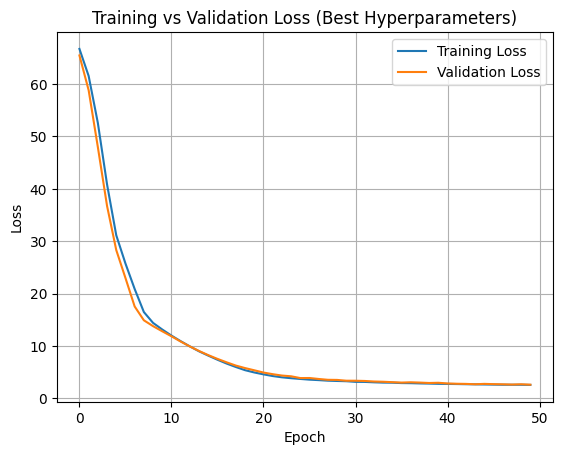

In [66]:
# 1. Get the best hyperparameters from tuning
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# 2. Build the model using the best hyperparameters
model = tuner.hypermodel.build(best_hp)

# 3. Train the model and store the history
history4 = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

# 4. Access training and validation loss from the history
import matplotlib.pyplot as plt

plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (Best Hyperparameters)')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
y_pred_b = best_model.predict(x_test)
r2_score(y_test,y_pred_b)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


0.8069432616999179

Compare the accuracies of different models and finalize the best model.

| Model Name                  | Accuracy | Training Loss | Validation Loss |
|-----------------------------|----------|----------------|------------------|
| Model (3HLs)               | 0.91     | 1.7137         | 1.698            |
| Dropout Regularization     | 0.84     | 3.3316         | 2.357            |
| Early Stopping             | 0.84     | 2.13           | 1.71             |
| Keras Tuner + Early Stopping | 0.80     | 2.58           | 2.61             |


c) Use the following Face Mask detection Dataset link and create an end-to-end project on Colab to predict whether person is wearing mask or not.

https://www.kaggle.com/datasets/omkargurav/face-mask-dataset/data


i. Import the dataset in Colab and perform the EDA and do the visualizations.

ii. Create model from scratch using your own number of filters, loss functions, no. of epochs and check the accuracy.

iii. Now use the pretrained model to check if accuracy gets improved.

iv. After that, go for data augmentation and further check if accuracy has improved.

v. Compare the training and testing accuracy with all these 3 approaches and suggest the best model.



d) Explain the role of padding and stride in convolutional layers? How will you decide when to use the padding.


e) How does data augmentation help in improving CNN performance?

In [67]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 70% 114M/163M [00:00<00:00, 1.17GB/s]
100% 163M/163M [00:00<00:00, 1.04GB/s]


In [68]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()